In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.autograd import Variable
import torchvision.transforms as transforms
%matplotlib inline

In [2]:
train_data=datasets.MNIST(root="./Pytorch_Datasets",
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

In [3]:
test_data=datasets.MNIST(root="./Pytorch_Datasets",
                        train=False,
                        transform=transforms.ToTensor())

In [4]:
len(train_data)

60000

In [5]:
a=np.array(train_data[0][0])

In [6]:
a=a.reshape(28,28)

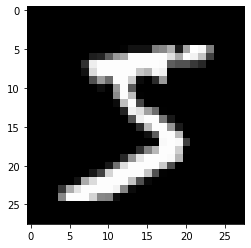

In [7]:
plt.imshow(a,cmap="gray")

In [8]:
b=np.array(test_data[1][0])

In [9]:
b=b.reshape(28,28)

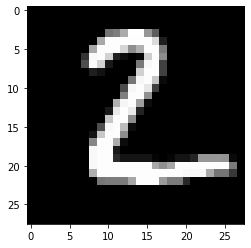

In [10]:
plt.imshow(b,cmap="gray")

In [11]:
test_data[1][1]
batch_size=100
n_iter=3000

# Totaldata=60000 #MinBatch=100 #Iteration=3000

epoch=iteration/Toaldata/minBatch

In [12]:
num_epoch=n_iter/(len(train_data)/batch_size)
num_epoch=int(num_epoch)
num_epoch

5

In [13]:
train_loader=torch.utils.data.DataLoader(dataset=train_data,
                                        batch_size=batch_size,
                                        shuffle=True)

In [14]:
test_loader=torch.utils.data.DataLoader(dataset=test_data,
                                       batch_size=batch_size,
                                       shuffle=False)

In [15]:
import collections
isinstance(train_loader,collections.Iterator)

c:\users\parikalp\appdata\local\programs\python\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  


False

In [16]:
import collections
isinstance(test_loader,collections.Iterator)

False

In [17]:
class Logistic_Reg(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(Logistic_Reg,self).__init__()
        self.linear=nn.Linear(input_dim,output_dim)
    
    def forward(self,x):
        out=self.linear(x)
        return out

In [18]:
input_dim=28*28
output_dim=10
model=Logistic_Reg(input_dim,output_dim)

In [19]:
criterion=nn.CrossEntropyLoss()

In [20]:
lr=0.001
optimizer=torch.optim.SGD(model.parameters(),lr=lr)

In [21]:
print(len(list(model.parameters())[0].size()))
print(list(model.parameters())[0].size())
print(list(model.parameters())[1].size())

2
torch.Size([10, 784])
torch.Size([10])


In [25]:
iter=0
for i in range(num_epoch):
    for i,(images,labels) in enumerate(train_loader):
        images=Variable(images.view(-1,28*28))
        label=Variable(labels)
        
        optimizer.zero_grad()
        
        output=model(images)
        
        loss=criterion(output,labels)
        
        loss.backward()
        
        optimizer.step()
        
        iter+=1
        
        if iter%500==0:
            correct=0
            
            total=0
            
            for images,labels in test_loader:
                images=Variable(images.view(-1,28*28))
                
                output=model(images)
                
                _,prediction=torch.max(output.data,1)
                
                total+=labels.size(0)
                
                correct+=(prediction ==labels).sum()
                
            accuracy=100* correct / total
            
            print(f"iteration {iter} : loss {loss} : Accuracy {accuracy}")

iteration 500 : loss 0.8162297606468201 : Accuracy 84
iteration 1000 : loss 0.6430906653404236 : Accuracy 86
iteration 1500 : loss 0.5588566660881042 : Accuracy 87
iteration 2000 : loss 0.5070001482963562 : Accuracy 88
iteration 2500 : loss 0.4983270764350891 : Accuracy 88
iteration 3000 : loss 0.3418957591056824 : Accuracy 89


In [27]:
iter_test=0
for images,labels in test_loader:
    iter_test+=1
    images=Variable(images.view(-1,28*28))
    
    output=model(images)
    
    if iter_test==1:
        print("Output")
        print(output)
        
    _,prediction=torch.max(output.data,1)

Output
tensor([[-4.9454e-02, -3.7438e+00, -5.7111e-01,  9.2824e-01, -8.8076e-01,
         -9.3315e-01, -2.8574e+00,  6.7689e+00, -5.0244e-01,  1.9389e+00],
        [ 1.6304e+00, -1.1414e+00,  4.5532e+00,  2.0076e+00, -5.2267e+00,
          2.1382e+00,  2.9868e+00, -5.3021e+00,  1.3623e+00, -4.2088e+00],
        [-2.3083e+00,  4.3889e+00,  6.2033e-01,  3.2526e-01, -1.5608e+00,
         -6.6844e-01, -2.8063e-01, -2.3547e-01,  5.0337e-01, -8.6144e-01],
        [ 6.9332e+00, -6.4127e+00,  3.1005e-01, -5.4082e-01, -3.5325e+00,
          1.7443e+00,  2.0115e+00,  8.8553e-01, -5.1525e-01, -3.8633e-01],
        [-5.2672e-01, -4.1587e+00,  5.7131e-01, -1.7696e+00,  3.7982e+00,
         -1.1893e+00,  2.2282e-01,  8.9702e-01,  5.0155e-01,  1.6397e+00],
        [-3.1658e+00,  5.3166e+00,  5.3280e-01,  7.5740e-01, -1.7028e+00,
         -1.0891e+00, -1.5144e+00,  2.8015e-01,  9.9964e-01, -4.1108e-01],
        [-2.8868e+00, -3.1113e+00, -2.8796e+00,  2.8967e-01,  3.9353e+00,
          1.4215e+00, -1.

In [29]:
iter_test=0
for images,labels in test_loader:
    iter_test+=1
    images=Variable(images.view(-1,28*28))
    
    output=model(images)
    
    if iter_test==1:
        print("Output")
        print(output.size())
        
        
    _,prediction=torch.max(output.data,1)

Output
torch.Size([100, 10])


In [31]:
iter_test=0
for images,labels in test_loader:
    iter_test+=1
    images=Variable(images.view(-1,28*28))
    
    output=model(images)
    
    if iter_test==1:
        print("Output")
        print(output[0,:])
        
        
    _,prediction=torch.max(output.data,1)

Output
tensor([-0.0495, -3.7438, -0.5711,  0.9282, -0.8808, -0.9332, -2.8574,  6.7689,
        -0.5024,  1.9389], grad_fn=<SliceBackward>)
